CSCI-P556: Applied Machine Learning
Fall 2018
Assignment #2
---



## Problem 1 (50 points)

In this problem you will be working with Bank Marketing Dataset. We encourage your to look at the description and make yourself comfortable with it: https://archive.ics.uci.edu/ml/datasets/bank+marketing

Two pairs of training and validation sets have been drawn from this dataset for you to work with, namely: 
 -  `train_1.csv` and `valid_1.csv`
 -  `train_2.csv`and `valid_2.csv`
 
Finally, we have also provided a `test.csv` which is common for both settings.

### Task 0: (3 points)

What is the difference between the two sets of train/validation sets? Write your answer here:

### Ans: 

Train and Valid set 1: The train set contains 6769 training samples with 16 input features and y as the output. Valid set contains 1693 samples i.e. 25 percent of the training data. Valid data is not a subset of train data.

Train and Valid set 2: The train set contains 28934 training samples with 16 input features and y as the output. Valid set contains 7234 samples i.e. again 25 percent of the training data. Valid data is not a subset of train data.


Further, 
Train Set 1 contains 3385 records for y=yes entry and 3384 records for y=no entry. 
Valid Set 1 contains 846 records for y=yes entry and 847 records for y=no entry.

Train Set 2 contains 3385 records for y=yes entry and 25549 records for y=no entry.
Valid Set 2 contains 846 records for y=yes entru and 6388 records for y=no entry

So the Training and valid set 2 is skewed towards one output i.e y=no. While, Training set 1 is equally distributed among both the classes.



### Task 1 (Data Preprocessing) (12 points)

Before you can train a machine learning model using this dataset, you will have to run a number of preprocessing steps to transform the data into a form which will be acceptable to the model. In this task, you are supposed to carry out the follow steps:

1.  Find all features that have continuous numeric values and normalize them in the same way as you did in Assignment 1. List those features here.

2. Find all categorical features and process them as was discussed in class. List those features and explain what you did.

3. Are there any features which have missing values? (Hint: Missing values aren't always nicely represented and can be misleading sometimes). Find those features and explain how you will handle them.



Write your text-based answers here.


1. The continuous numeric values are 
  a) Age
  b) Balance
  c) Day
  d) Duration
  e) Campaign
  f) pdays
  g) previous
_______________________________________________________________________________________________________________________________  
2. Categorical features are :
a) Job b) Marital c) Education d) Default e) Housing f) Loan g) Contact h) Month i) poutcome  j) y

    Categorical values can be processed in two ways:
    a. Assigning Number to different numerical value to categories in the variable. This is done when we can estimate the importance of any category.

    For eg. In Poutcome variable. nonexistent:0, failure:1, Success:2 
    Education,Housing,Loan,Contact,Month, poutcome can be encoded in this way

    b. One hot coding: Any categorical values can be converted to have numerical features by encoding all the possible combinations with 0's and 1's. And hence, we dont bias the model fitting by giving importance to random categories. 

    For eg. Job and Marital variables cannot be ranked numerically. In this case, one hot coding is used. 
_______________________________________________________________________________________________________________________________

3. Yes, there are features with unknown values

    a. pdays  

    Unknown values in pdays is -1.
    Since pdays has more than 70% values as -1 replacing this with most repeated element (one of the technique to fill unkown values). After filling the unknown values with mode of the data, most of the values in that would have one value which would not give useful information to the model. That is why I am dropping the column pdays in the preprocessing.



In [199]:
# PROBLEM 1, TASK 1 CODE GOES HERE
import pandas as pd
import numpy as np
from sklearn import preprocessing

train_set1 = pd.read_csv('train_1.csv', sep = ",")
valid_set1= pd.read_csv('valid_1.csv', sep = ",")
train_set2 = pd.read_csv('train_2.csv', sep = ",")
valid_set2 = pd.read_csv('valid_2.csv', sep = ",")
test=pd.read_csv('test.csv', sep = ",")


inp_var_t1,data_output_t1=Data_preprocessing(train_set1)
inp_var_v1,data_output_v1=Data_preprocessing(valid_set1)
inp_var_t2,data_output_t2=Data_preprocessing(train_set2)
inp_var_v2,data_output_v2=Data_preprocessing(valid_set2)

inp_var_test,data_output_test=Data_preprocessing(test)

def Data_preprocessing(data):
    Var= list(data.columns)
    categorical_var=["job","marital","education","default","housing","loan","contact","month","poutcome","y"]
    output_var=["y"]
    col_del=["pdays"]
    numerical_var=[i for i in Var if i not in categorical_var+output_var+col_del]
    mean_numerical= [np.mean(data[i]) for i in numerical_var]
    std_numerical=[np.std(data[i]) for i in numerical_var]
    
    data_output=data["y"]
    data_input=data
    data_input=data_input.drop(columns=["y","pdays"])
    
    # Preprocessing of numerical values
    for (ind,val) in enumerate(numerical_var):
        data[val]=(data[val]-mean_numerical[ind])/std_numerical[ind]
        
    #one hot encoding of all the categorical values.
    # drop_first is set True because any two variable can be represented
    cat_var=pd.get_dummies(data_input,drop_first=True)
    
    #output variable encoding
    dict_y={"yes":1,"no":0}
    data_output=pd.DataFrame(data_output.map(dict_y),columns=["y"])
    
    return cat_var,data_output


### Task 2 (Model $\mathcal{A}$) (10 points)

Train a logistic regression model with $L_2$ regularization on `train_1.csv` after applying the necessary preprocessing steps of Task 1. Use the validation set `valid_1.csv` to choose the best regularization coefficient $\lambda$. Plot a curve with regularization coefficient in the X axis and the validation accuracy on the Y axis.

Lambda with high accuracy is 20
Accuracy of valid set is 81.86650915534554
Accuracy of train set is 83.23238292214508
Accuracy of test set is 83.09189428287073


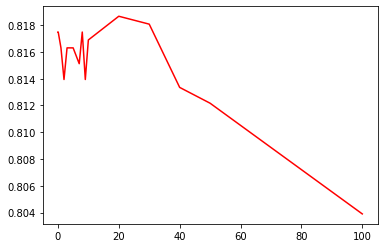

In [200]:
# PROBLEM 1, TASK 2 CODE GOES HERE
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import warnings

#assigning different values to lambda 
lambda_ = [0.001,0.01,0.1,1,2,3,4,5,6,7,8,9,10,20,30,40,50,100]
warnings.filterwarnings("ignore")
accuracy_valid=[]
accuracy_train=[]
for i in lambda_:
    #creating a instance for logistic regression
    regressor = LogisticRegression(penalty='l2',C=1/i)
    regressor.fit(inp_var_t1,data_output_t1)
    
    #testing for accuracy on valid set
    accuracy_valid.append(regressor.score(inp_var_v1,data_output_v1))
    accuracy_train.append(regressor.score(inp_var_t1,data_output_t1))

#finding the best lambda 
lambda_final=lambda_[accuracy_valid.index(max(accuracy_valid))]
print("Lambda with high accuracy is "+str(lambda_final))

regressor_final=LogisticRegression(penalty="l2",C=1/lambda_final)


#fit a final model with high accuracy
regressor_final.fit(inp_var_t1,data_output_t1)


#valid set accuracy
print("Accuracy of valid set is "+str(max(accuracy_valid)*100))

#train set accuracy
print("Accuracy of train set is "+str(max(accuracy_train)*100))

#test set accuracy 
test_set_accuracy=regressor.score(inp_var_test,data_output_test)
print("Accuracy of test set is "+str(test_set_accuracy*100))


#graph of lambda and accuracy for train and valid set 1
plt.plot(lambda_,accuracy_valid,color="red",label="Accuracy Graph")


### Task 3 (Model $\mathcal{B}$) (5 points)
Train a logistic regression model with $L_2$ regularization on `train_2.csv` after applying the necessary preprocessing steps of Task 1. Use the validation set `valid_2.csv` to choose the best regularization coefficient $\lambda$. Plot a curve with regularization coefficient in the X axis and the validation accuracy on the Y axis.

Lambda with high accuracy is 1
Accuracy of valid set is 90.11611833010782
Accuracy of train set is 90.29169834796433
Accuracy of test set is 89.76003538648678


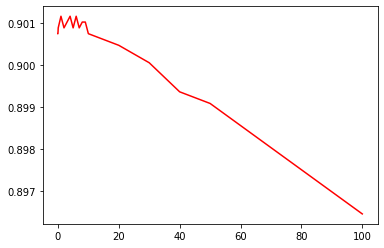

In [201]:
# PROBLEM 1, TASK 3 CODE GOES HERE
# PROBLEM 1, TASK 2 CODE GOES HERE
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

#assigning different values to lambda 
lambda_ = [0.001,0.01,0.1,1,2,3,4,5,6,7,8,9,10,20,30,40,50,100]

accuracy_valid=[]
accuracy_train=[]
for i in lambda_:
    #creating a instance for logistic regression
    regressor = LogisticRegression(penalty='l2',C=1/i)
    
    #fitting a training data
    regressor.fit(inp_var_t2,data_output_t2)
    
    #testing for accuracy on valid set
    accuracy_valid.append(regressor.score(inp_var_v2,data_output_v2))
    accuracy_train.append(regressor.score(inp_var_t2,data_output_t2))


#finding the best lambda 
lambda_final=lambda_[accuracy_valid.index(max(accuracy_valid))]
print("Lambda with high accuracy is "+str(lambda_final))

regressor_final=LogisticRegression(penalty="l2",C=1/lambda_final)

#fit a final model with high accuracy
regressor_final.fit(inp_var_t2,data_output_t2)

#valid set accuracy
print("Accuracy of valid set is "+str(max(accuracy_valid)*100))

#train set accuracy
print("Accuracy of train set is "+str(max(accuracy_train)*100))

#test set accuracy 
test_set_accuracy=regressor.score(inp_var_test,data_output_test)
print("Accuracy of test set is "+str(test_set_accuracy*100))

#graph of lambda and accuracy for train and valid set 1
plt.plot(lambda_,accuracy_valid,color="red",label="Accuracy Graph")


### Task 4 (Model $\mathcal{C}$) (10 points)

As you have seen in class, due to the specific (and smart) choice of the loss function, a logistic regression classifier happens to predict the posterioir probability $p(y|\mathbf{x})$ for any given sample. It then classifies the samples with $p(y|\mathbf{x}) > 0.5$ as belonging to class $1$ and the rest as belonging to class $0$. Instead, for a fixed threshold of $0.5$, let us consider a dynamic threshold of $\theta$ which can be chosen after a model has been trained.

$$
\ y=
\begin{cases}
1 \text{ if } p(y|\mathbf{x}) \geq \theta \\
\\
0 \text{ if } p(y|\mathbf{x}) < \theta \\
\end{cases}
$$

for $0 \leq \theta \leq 1$.

Train a logistic regression model with $L_2$ regularization on `train_2.csv` after applying the necessary preprocessing steps of Task 1. Use the validation set `valid_2.csv` to choose the best combination of regularization coefficient $\lambda$ and the threshold $\theta$. The best coefficients has to be selected by you after trying out at least five, non-consecutive values. Visualize all these runs.

**Hint**: Look at the documentation of Logistic Regression in sci-kit learn to come up with a plan to implement this.

Accuracy of valid set is 0.9033729610174177
Optimal value of lamba and threshold is 1 & 0.4 respectively
Accuracy of train set is 0.9030897905578212
Accuracy of test set is 0.9032400751962845


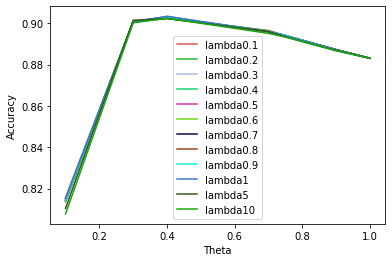

In [202]:
# PROBLEM 1, TASK 4 CODE GOES HERE

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import random
# initializing lambda
lambda_= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,5,10]

# initializing thresholds(theta)
theta=[0.1,0.3, 0.4, 0.7,0.75,0.9,1]

lam_thr=[]
acc_thre=[]
acc_lambda=[]
acc=[]


#takes lambda,threshold,x,y
# return accuracy

def non_symmetrical_reg(i,j,inp_var,data_output):
    
    #predicting the probability to manually set the threshold
    y_pred=regressor.predict_proba(inp_var)
        
    y_pred=y_pred[:,1]
    y_pred=y_pred>=j
    y_pred=[int(i) for i in y_pred]
        
    lam_thr.append((i,j))
        
    acc_val=accuracy_score(data_output["y"],y_pred)
    
    return acc_val

for i in lambda_:
    #creating instance
    regressor=LogisticRegression(penalty="l2",C=1/i)
        
    #fitting a training data
    regressor.fit(inp_var_t2,data_output_t2)
    for j in theta:
        
        acc_val=non_symmetrical_reg(i,j,inp_var_v2,data_output_v2)
        
        acc.append(acc_val)
        acc_thre.append(acc_val)
        # plotting the graph of 
    
    plt.plot(theta,acc_thre,color=np.random.rand(3,),label="lambda"+str(i))
    acc_lambda.append(acc_thre)
    acc_thre=[]

print("Accuracy of valid set is "+str(max(acc)))
print("Optimal value of lamba and threshold is " +str(lam_thr[acc.index(max(acc))][0])+" & "+str(lam_thr[acc.index(max(acc))][1])+" respectively")

acc_val_train=non_symmetrical_reg(lam_thr[acc.index(max(acc))][0],lam_thr[acc.index(max(acc))][1],inp_var_t2,data_output_t2)
print("Accuracy of train set is "+str(acc_val_train))

acc_val_test=non_symmetrical_reg(lam_thr[acc.index(max(acc))][0],lam_thr[acc.index(max(acc))][1],inp_var_test,data_output_test)
print("Accuracy of test set is "+str(acc_val_test))

plt.xlabel("Theta")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



### Task 5 (Report and Conclusion) (10 points)

1.  Give a detailed report on the performance (that is, accuracy) of Models $\mathcal{A}$, $\mathcal{B}$ and $\mathcal{C}$ on the respective training sets, the validation sets and finally the test. Explain any intuition you might have on what might be happening in each of the cases. Please avoid writing unnecessary details which are not pertinent.
_______________________________________________________________________________________________________________________________
-- Model A: Since this model is trained for small dataset(not enough data to learn the accurate decision boundary). The accuracy for valid,test and train are less. Lambda for high accuracy is 20.

-- Model B: Since this model has training samples, the accuracy for valid, train and test are high. Since the threshold for this model is fixed to default value (i.e. 0.5), the test set accuracy is low compared to model C. Here, optimal lambda is 1

-- Model C: Since this model has training samples same as model B, the accuracy for train accuracy is almost the same. And, the accuracy for the test and valid is slightly high because the optimal threshold (the value at which the data is divided into two classes accurately) for this data is 0.4. Optimal lambda is 4.
_______________________________________________________________________________________________________________________________
2.  Do you think accuracy, the metric which you have used to find the best hyperparameter in all the above tasks, a good metric in this scenario? Explain your choice.
_______________________________________________________________________________________________________________________________
-- The data is divided into three parts train, valid and test. 
In all the model we are tuning the model based on the accuracy obtained from the valid set. In real world senario, any historical data with the output is divided into train and valid set and then the model is applied to the data with unknown output for the predictions. 

Since we can observe the model's behaviour on unknown data and also compare its prediction with already available output. Accuracy on valid set is the best metric to trigger the parameter.
_______________________________________________________________________________________________________________________________

## Problem 2 (50 points)

Consider a regression problem in which the input variable $x$ has only one feature and the target variable $y$ is generated from the input variable $x$ by a polynomial $f(x)$. The function $f$ is such that $$f(x) = \sum_{i=0}^d w_ix^i$$ Please note that a given polynomial function can be completely described by the vector of coefficients $\mathbf{w}$.

### Task 1 (5 points)

Write a function in python which can take the degree of polynomial function as input. The code to generate vector coefficeints $\mathbf{w}$ using this input is already provided. Plot the resulting function for $x \in (-low, high)$. The function should be plot 

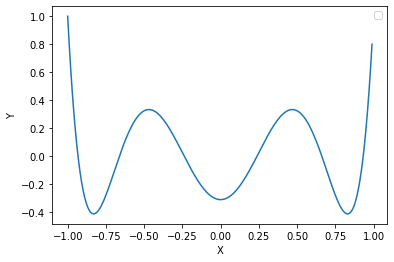

In [203]:
import numpy as np
from scipy.special import legendre

def get_coefficients(degree):
    """
    The coefficients returned are in the order w_0, w_1, ... , w_{degree}
    """
    return legendre(degree).coefficients[::-1]

def visualize_function(degree, low, high):
    w = get_coefficients(degree)
    
    # creating an array for x
    x_range = np.arange(low,high, 0.01)
    y=[]
    for i in x_range:
        summ=0
        for j in range(degree+1):
            summ=summ+(w[j]*(i**(j)))
        y.append(summ)
        
    plt.plot(x_range,y,label="Plot of X vs y")

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

## TEST CASES (The following lines should plot a function)
#visualize_function(3, -1, 1)
#visualize_function(4, -1, 1)
visualize_function(6, -1, 1)



### Task 2 (5 points)

Write a function in python that randomly generates a dataset (training data + test data). The function should take the degree of target polynomial as input along with the number of points that should be generated for both the training and the test sets. The polynomial will be represented by the vector of coefficients. The code to calculate these coefficients has been provided. The function should also add random normal noise to the target -- i.e. the noise should be drawn from a normal distribution with mean $\mu=0$ and standard deviation = $\sigma^2$. Thus: 
$$y=\sum_{i=0}^d w_ix^i + \mathcal{N}(0, \sigma^2)$$



In [204]:
def generate_dataset(degree, n_train, n_test, sigma):
    """
    - n_train - Number of training samples
    - n_test - Number of test samples
    - X_train is an array of size (n_train $\times$ 1)
    - y_train is an array of size (n_train $\times$ 1)
    - X_test is an array of size (n_test $\times$ 1)
    - y_test is an array of size (n_test $\times$ 1)
    """
    w = get_coefficients(degree)
    
    # creating an array for x
    x_range = np.random.uniform(-1,1,n_train+n_test)
    y=[]
    for i in x_range:
        summ=0
        for j in range(degree+1):
            summ=summ+(w[j]*(i**(j)))
        y.append(summ+np.random.normal(0, sigma))
    X_train=x_range[0:n_train]
    y_train=y[0:n_train]
    X_test=x_range[n_train:]
    y_test=y[n_train:]
    
    return X_train, y_train, X_test, y_test
X_train, y_train, X_test, y_test=generate_dataset(2,4,4,4)

### Task 3 (20 points)

1.   Use the function written in Task 2 to generate a dataset of degree $10$, with $20$ samples each in the training and test sets. The standard deviation of the noise should be $0.2$.
2.   Plot the generated points of the train set over the function. Make use the function you wrote in Task 1 to do so. The resultant plot should not only contain the function in blue color but also the generated points in the train set in red color.
3.   Fit two linear regressions models: $\mathcal{A}$ and $\mathcal{B}$ on the given training data. Model $\mathcal{A}$ should be quadratic and Model $\mathcal{B}$ should be of degree $10$. How would you create such models?
4. Calculate the training error and testing error on both these models and report them nicely in a table.
5. Explain the results:
 - Are the results as expected or surprising? Explain your stance.
 - Give a detailed explanation of why this happens.
 
 **Hint**: You are free (in fact encouraged) to design new experiments under the same paradigm to understand what is happening. You can buttress your explanation with any plots which you might generate from such new experiments.

 
Note: _There is no preference over the size of the answer but please note that you shouldn't write anything that is not pertinent. While being terse, your answer should clearly convey the intuition. Also, use logical number code/text cells---i.e. every subquestion in a given task which can be considered a logical unit should be present in one cell. Do not make one cell unnecessarily long by putting multiple answers in it or split a given answer over multiple cells. Use your best judgement.

,degree,Train_set,Test_set
0,2,0.287761,0.258981
1,10,0.206369,0.288790


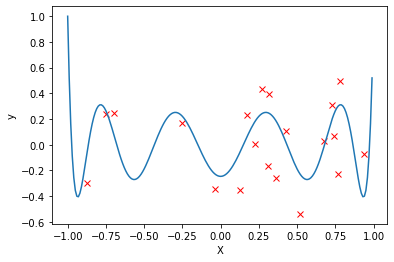

In [205]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Task 3, 1 to 4 problem statements

X_train, y_train, X_test, y_test=generate_dataset(10,20,20,0.2)

#plotting x's for the train set

plt.plot(X_train,y_train,'rx')

#visualize the continuous 

visualize_function(10,-1,1)
plt.xlabel("X")
plt.ylabel("y")


#model training for degree more than 1

def poly_regression(X_train,y_train,X_test,y_test,degree):
    
    X_train = X_train[:, np.newaxis] #converts into list of list [[],[]]
    #y_train = y_train[:, np.newaxis] 
    
    # polynomial features 
    polynomial_features= PolynomialFeatures(degree)
    
    #getting all the polynomials 
    X_train_poly = polynomial_features.fit_transform(X_train)
    
    regressor = LinearRegression()
    
    regressor.fit(X_train_poly, y_train)

    #predict 
    y_pred_train = regressor.predict(X_train_poly)
    
    #error train set
    rmse_train = np.sqrt(mean_squared_error(y_train,y_pred_train))
    
    #predict test
    y_pred_test = regressor.predict(X_train_poly)
    
    #error test set
    rmse_test = np.sqrt(mean_squared_error(y_test,y_pred_test))
    
    return rmse_train,rmse_test


(rmse_train1,rmse_test1) = poly_regression(X_train,y_train,X_test,y_test,2)
(rmse_train2,rmse_test2) = poly_regression(X_train,y_train,X_test,y_test,10)

results={"degree":(2,10),"Train_set":(rmse_train1,rmse_train2),"Test_set":(rmse_test1,rmse_test2)}
results=pd.DataFrame(results)
results


# Task 3 Problem Statement 5

To understand the above results. Let us consider the difference and similarity between the two data

1) Both the data set have same number of samples for train and test and are randomly generated where the range of x's in both  the case is similar.

2) Both the data set has noise with same standard deviation.

3) The only difference in the two dataset is the degree of the input variable.

The equation for first model is y=w1*(x^0)+(w2*x^1)+(w3*x^2)
The equation for second model is y=w1*(x^0)+(w2*x^1)+...+(w11*x^10)

As studied in the class wkt the model overfits the data if there is high polynomiality. Here, we can see that second model has high polynomiality (for x) with 10 features (x,x^2,x^3,...) and also the error for test set is high in this case. While for the first model the test accuracy is high. 
Thus,
1) First model (degree=2) does not overfit the data and has comparable error for test and train set
2) Second model (degree=10) does overfit the data and has huge difference in the error for train(less error) and test(high error) 

Important consideration is that random X's is generated with degree=10. So, speaking about the results. The results are surprising because the model with degree 2 fits data better than model with degree 20.


### Task 4 (20 points)

1.  Use the function written in Task 2 to generate a dataset of degree 45, with 20 samples each in the training and test sets. There should be no noise in the samples.
2.  Repeat steps 2 to 4 from Task 3 for this dataset.
3.  This target doesn't have noise like the previous one. Does this make the result surprising? Explain your stance. Also give a detailed explanation of why this happens.

**Hint**: You are free (in fact encouraged) to design new experiements under the same paradigm to understand what is happening. You can buttress your explanation with any plots which you might generate from such new experiments.

,degree,Train_set,Test_set
0,2,18922.42779,37.313240
1,10,37.31324,28514.912176


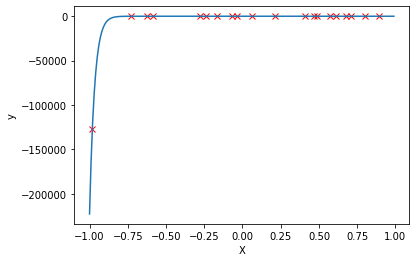

In [213]:
# Task 3, 1st problem

X_train, y_train, X_test, y_test=generate_dataset(45,20,20,0)

#plotting x's for the train set

plt.plot(X_train,y_train,'rx')

#visualize the continuous 

visualize_function(45,-1,1)
plt.xlabel("X")
plt.ylabel("y")


#task 3,4
(rmse_train1,rmse_test1) = poly_regression(X_train,y_train,X_test,y_test,2)
(rmse_train2,rmse_test2) = poly_regression(X_train,y_train,X_test,y_test,10)

results={"degree":(2,10),"Train_set":(rmse_train1,rmse_train2),"Test_set":(rmse_train2,rmse_test2)}
results=pd.DataFrame(results)
results


# Task 4 Problem Statement 3

The generated data set is for degree=45 without any noise.

According to the results, we can see that the train set fits well by the high degree model. So, for high degree polynomial dataset model with higher degree fits well as there is no noise included with the generation of the data.

For test data set, again, higher the degree, higher the overfitting of the data. So, high polynomial degree performs bad for test data even in this case. 

Refer the graph below for the justification of above claim

Here we can see that as the degree increases model fits the train data well and error decreases(aka overfitting) but the test error increases


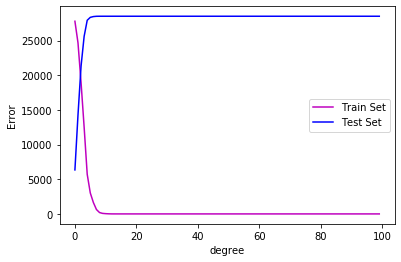

In [214]:
#X_train, y_train, X_test, y_test=generate_dataset(45,20,20,0)

degree= [ i for i in range(0,100)]
rmse_train_l=[]
rmse_test_l=[]

for i in degree:
    (rmse_train1,rmse_test1) = poly_regression(X_train,y_train,X_test,y_test,i)
    rmse_train_l.append(rmse_train1)
    rmse_test_l.append(rmse_test1) 
    
plt.plot(degree,rmse_train_l,color="m",label="Train Set")
plt.plot(degree,rmse_test_l,color="b",label="Test Set")
plt.xlabel("degree")
plt.ylabel("Error")
plt.legend()
print("Here we can see that as the degree increases model fits the train data well and error decreases(aka overfitting) but the test error increases")
plt.show()